Emiliano Di Cola - emilianodicola@gmail.com

In [2]:
#Se instalan las librerías. Es posible que estás librerías una vez instaladas 
# le solicite reiniciar el entorno por lo que se recomienda ir instalando de una a la vez.
#!pip install pycaret-ts-alpha
#!pip install prophet
#!pip install tbats
#!pip install xgboost==1.1.0

In [3]:
# Se importan las librerías
import pandas as pd
from pycaret.time_series import *
from pycaret import show_versions
show_versions() #Las versiones nos indican qué librerias hay instaladas y cuáles harían falta.
# La librería de Prophet no viene por defecto por lo que hay que instalarla. Esto es importante
# porque se va a visualizar más adelante, es el modelo que mejor predice. 




System:
    python: 3.7.14 (default, Sep  8 2022, 00:06:44)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
          pip: 21.1.3
   setuptools: 57.4.0
      pycaret: 3.0.0
      sklearn: 1.0.2
       sktime: 0.10.1
  statsmodels: 0.13.2
        numpy: 1.21.6
        scipy: 1.7.3
       pandas: 1.3.5
   matplotlib: 3.5.3
       plotly: 5.5.0
       joblib: 1.0.1
        numba: 0.55.2
       mlflow: Not installed
     lightgbm: 3.3.2
      xgboost: 1.1.0
     pmdarima: 2.0.1
        tbats: Installed but version unavailable
      prophet: 1.0
      tsfresh: Not installed


In [4]:
# # Se lee el archivo
df_Pycaret = pd.read_csv('/content/df_PyCaret.csv') 
#link para bajar el archivo: https://drive.google.com/file/d/1r3VtdarQd-vI-NFe4dsNymloFkw8psUS/view?usp=sharing

In [5]:
#se tranforma la columna "ds" (fecha) a formato datetime y se la usa de index
df_Pycaret['ds'] = pd.to_datetime(df_Pycaret['ds'])
df_Pycaret = df_Pycaret.set_index('ds')
df_Pycaret.info
df_Pycaret.sort_values(by = ["ds"], inplace = True)

PyCaret es una biblioteca de aprendizaje automático de código abierto en Python que automatiza los flujos de trabajo de aprendizaje automático. Es una herramienta integral de gestión de modelos y aprendizaje automático que acelera exponencialmente el ciclo de experimentación y lo hace más productivo.
En comparación con las otras bibliotecas de aprendizaje automático de código abierto, PyCaret es una biblioteca alternativa de *low code* que se puede usar para reemplazar cientos de líneas de código con solo unas pocas líneas. Esto hace que los experimentos sean exponencialmente rápidos y eficientes. PyCaret es esencialmente un contenedor de Python para varias bibliotecas y marcos de aprendizaje automático, como scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray y algunos más.
El diseño y la simplicidad de PyCaret están inspirados en el papel emergente de los científicos de datos ciudadanos, un término utilizado por primera vez por Gartner. Los científicos de datos ciudadanos son usuarios avanzados que pueden realizar tareas analíticas simples y moderadamente sofisticadas que anteriormente hubieran requerido más experiencia técnica.

https://pycaret.gitbook.io/docs/

Con Pycaret es realmente sencillo comparar algoritmos y modelos, y contiene todo lo necesario para configurar de punta a punta un experimento, trabajo o predicción. A continuación, se puso a prueba la librería con la misma base de datos con la que se trabajó para Auto Arima y Prophet (tweets posteados por usuarios geolocalizados en Río cuarto durante un período de dos meses aproximandamente) 

In [6]:
modelo = setup(data = df_Pycaret, session_id = 1, fold = 3, fh=50, fold_strategy = 'expanding', 
              fig_kwargs = {"height": 1000, "width": 2400}, verbose = True) 

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: bb3f
INFO:logs:self.variable_keys: {'_ml_usecase', 'n_jobs_param', 'y_train', '_all_models_internal', 'log_plots_param', 'approach_type', '_all_models', 'index_type', 'primary_sp_to_use', 'y_test_transformed', '_all_metrics', 'display_container', '_available_plots', 'seasonality_present', 'X_test_transformed', 'fold_generator', 'gpu_param', 'enforce_exogenous', 'master_model_container', 'X_train_transformed', 'strictly_positive', 'variable_keys', 'experiment__', 'X_train', 'y', 'exp_name_log', 'fh', 'seed', 'y_transformed', 'logging_param', 'exp_id', 'enforce_pi', 'X_transformed', 'fold_groups_param_full', 'exogenous_present', '_gpu_n_jobs_param', 'all_sp_values', 'data', 'fold_param', 'idx', 'html_param', 'y_test', 'y_train_transformed', 'seasonal_period', 'USI', 'X', 'X_test', 'pipeline

,Description,Value
0,session_id,1
1,Target,y
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(1238, 1)"
5,Train data shape,"(1188, 1)"
6,Test data shape,"(50, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 0.3s...............


Del 'setup' del modelo se desprenden varias cosas. Por un lado, automáticamente se separó la serie en *train* y *test* en base al 'fh' que se parametrizó. Fold Generator y Fold Numbeber indican el tipo de  Cross Validation y cantidad de fold.

También indica si hay estacionalidad, entre otros parémtros a revisar. 

En setup se puede agregar una importante cantidad de modificaciones y parámetros para trabajar la serie temporal. Cada serie tendrá sus especificaciones. Su uso es simple y es interesante visualizar cómo cada cambio en los parámetros repercute en los modelos, generando movimientos en el ranking de algoritmos y en la performances.

A continuación se listan los parámetros. En documentación se puede ampliar con más información. 

**Target**: Optional[str]=None;
 
**index:** Optional[str]=None;

**ignore_features**: Optional[List]=None;

**preprocess**: bool=True;

**numeric_imputation_target:** Optional[Union[int, float, str]]=None; 

**numeric_imputation_exogenous:** Optional[Union[int, float, str]]=None;
 
**transform_target:** Optional[str]=None;

**transform_exogenous:** Optional[str]=None;

**scale_target:** Optional[str]=None;

**scale_exogenous:** Optional[str]=None; 

**fold_strategy:** Union[str, Any]='expanding';
 
**fold:** int=3;
 
**fh:** Optional[Union[List[int], int, np.ndarray, ForecastingHorizon]]=1; 

**seasonal_period:** Optional[Union[List[Union[int, str]], int, str]]=None; 

**enforce_pi:** bool=False;

**enforce_exogenous:** bool=True; 

**n_jobs:** Optional[int]=-1; 

**use_gpu:** bool=False;

**custom_pipeline:** Union[Any, Tuple[str, Any], List[Any], List[Tuple[str, Any]]]=None; 

**html:** bool=True; 

**session_id:** Optional[int]=None;

**system_log:** Union[bool, logging.Logger]=True;

**log_experiment:** bool=False;

**experiment_name:** Optional[str]=None;

**log_plots:** Union[bool, list]=False;

**log_profile:** bool=False; 

**log_data:** bool=False;

**verbose:** bool=True;

**profile:** bool=False;

**profile_kwargs:** Dict[str, Any]=None;

**fig_kwargs:** Dict[str, Any]=None)

In [7]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,1238.0
1,Summary,Statistics,Actual,Mean,,144.035541
2,Summary,Statistics,Actual,Median,,138.5
3,Summary,Statistics,Actual,Standard Deviation,,100.375433
4,Summary,Statistics,Actual,Variance,,10075.227515
5,Summary,Statistics,Actual,Kurtosis,,2.231693
6,Summary,Statistics,Actual,Skewness,,0.98873
7,Summary,Statistics,Actual,# Distinct Values,,350.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",3716.995354
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",6784.297263


En check_stats se listan los diferentes tests que realiza el algortimo sobre los datos. Es un acercamiento completo a la serie y de aquí se debería desprender la necesidad de realizar o no transformaciones. En setup, con el parámentro 'transform_target', se pueden realizar transformaciones como la de Box y Cox u otras.

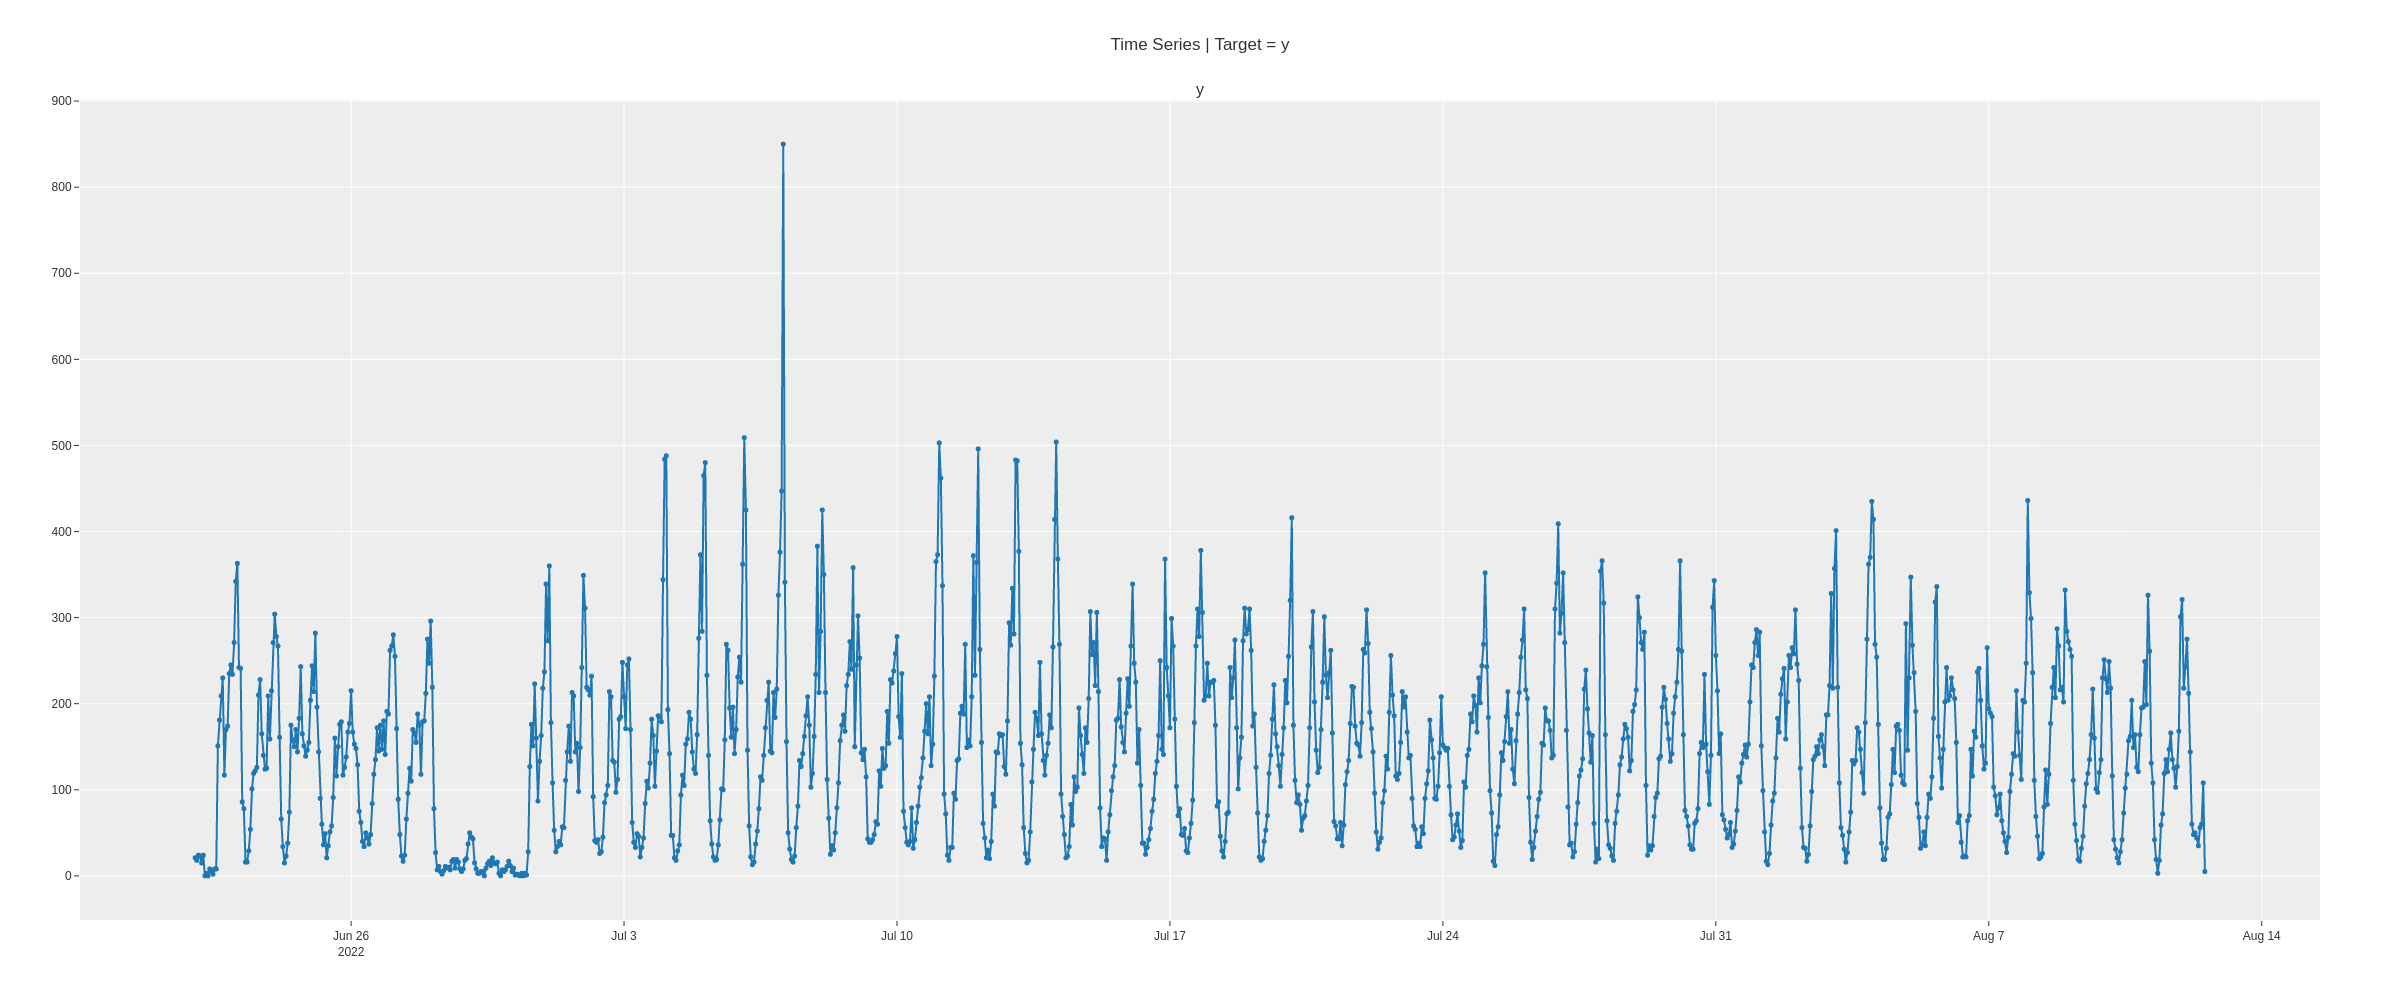

INFO:logs:Visual Rendered Successfully


In [8]:
#Se plotea la serie
plot_model()

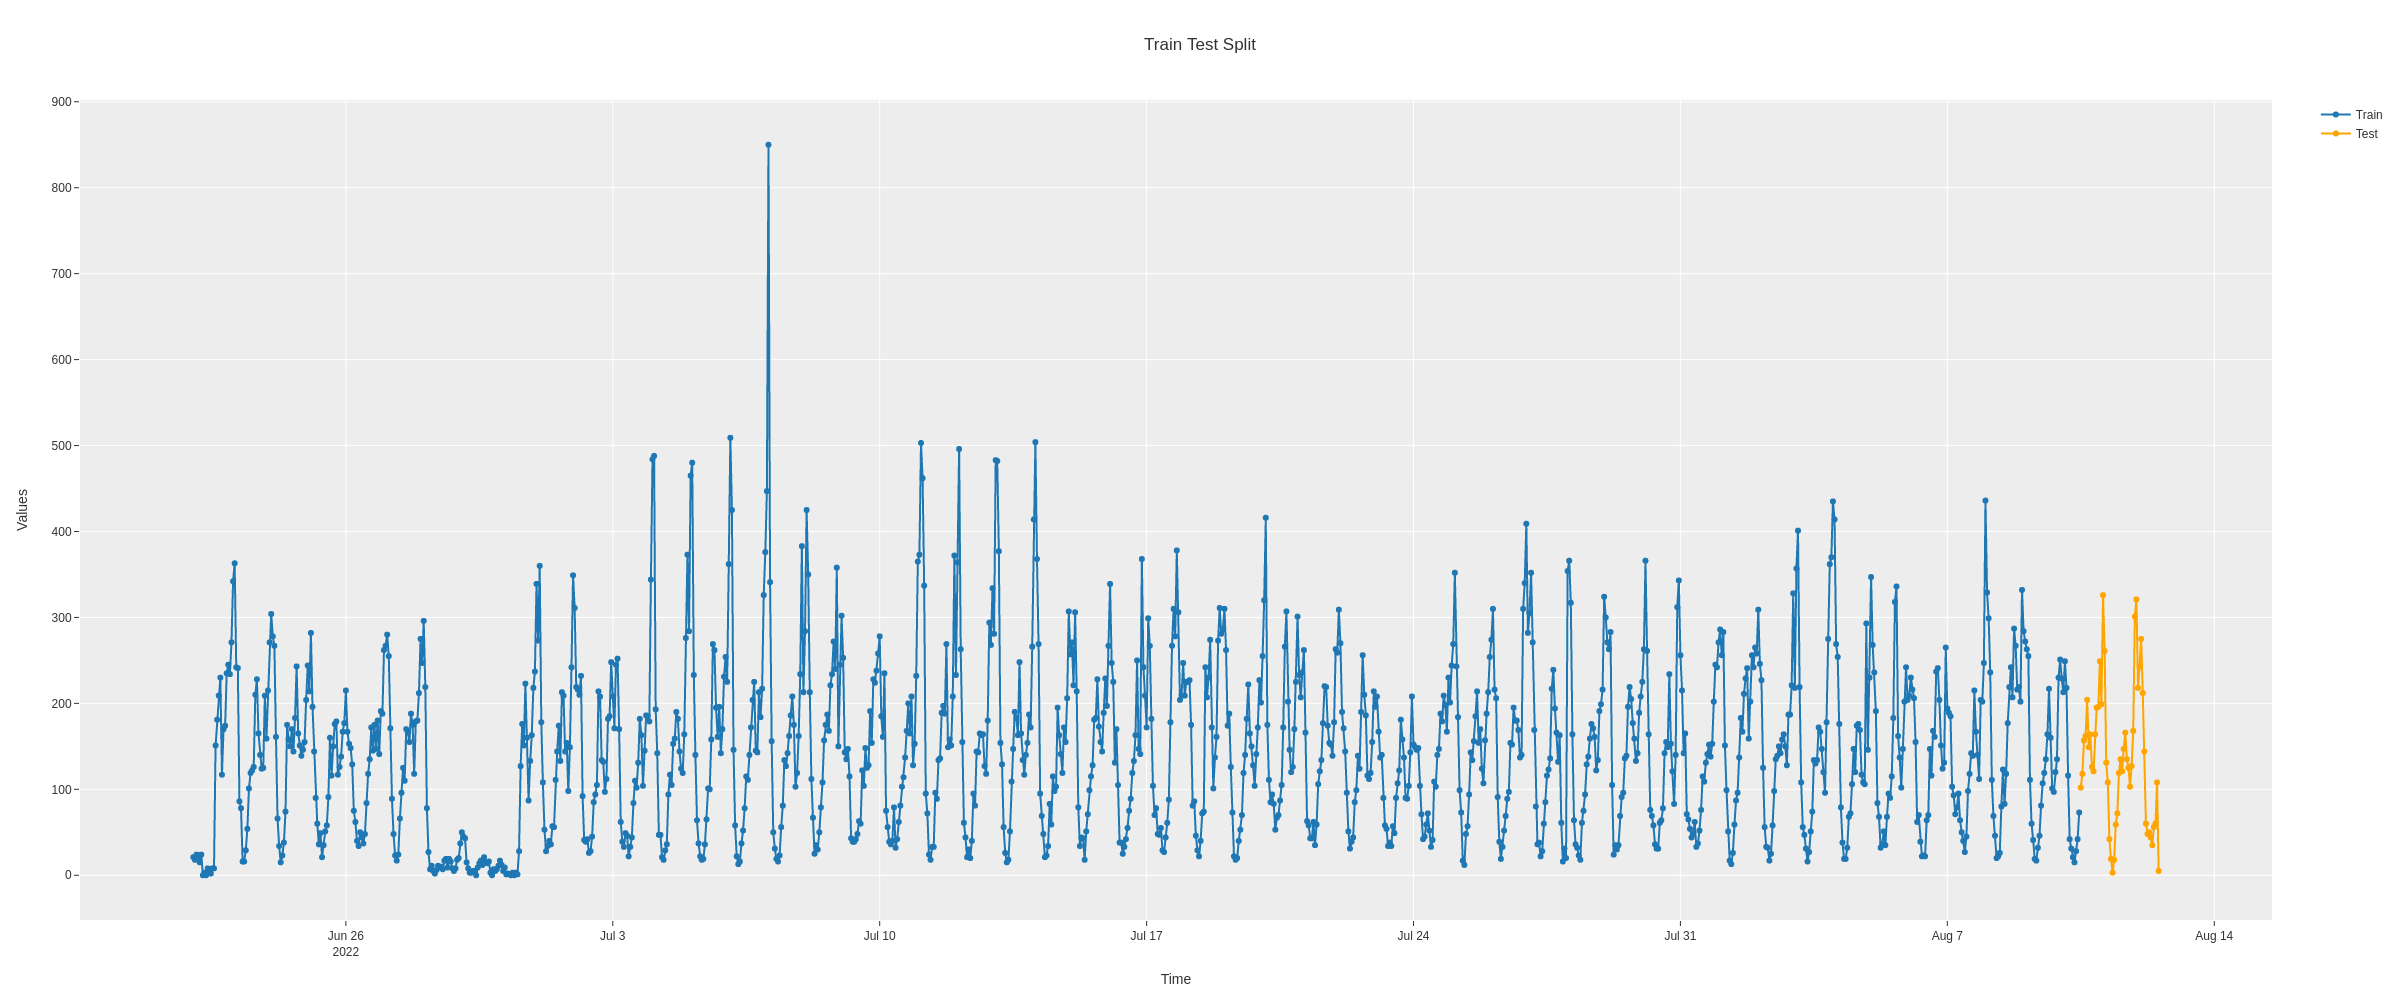

INFO:logs:Visual Rendered Successfully


In [9]:
#Se plotea la serie con el train y split en diferentes colores
plot_model(plot = "train_test_split")

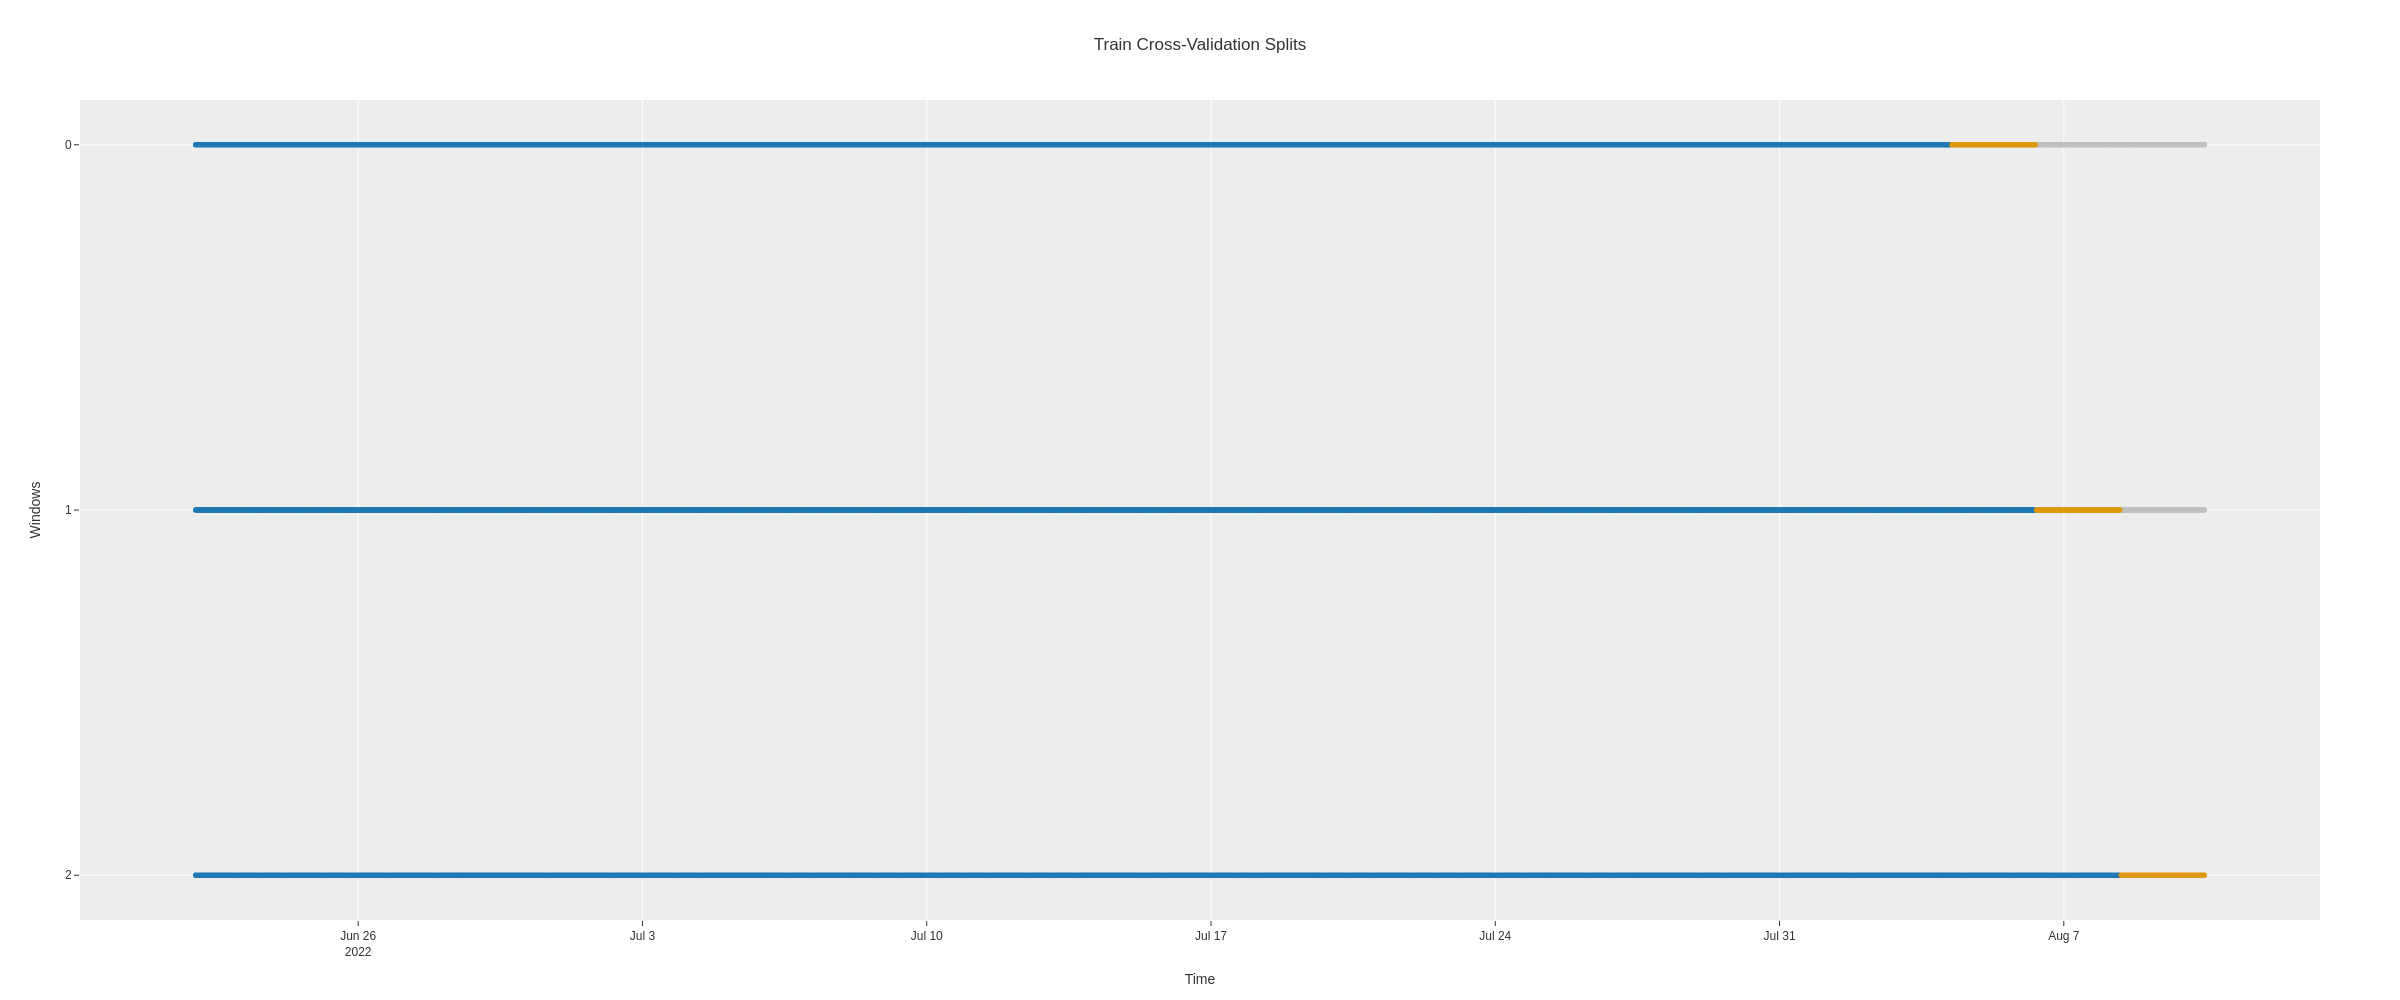

INFO:logs:Visual Rendered Successfully


In [10]:
#Se plotea el Cross Validation
plot_model(plot = "cv")

Se puede visualizar en el gráfico 'cv', el tipo de Cross Validation que se seleccionó para entrenar el modelo. A diferencia de los CV para clasificación, en series es importante que sean secuenciales temporalmente porque la historia tiene significado para el futuro. Además, el tipo de CV elegido realiza ventanas termporales continuas de menor a mayor.   

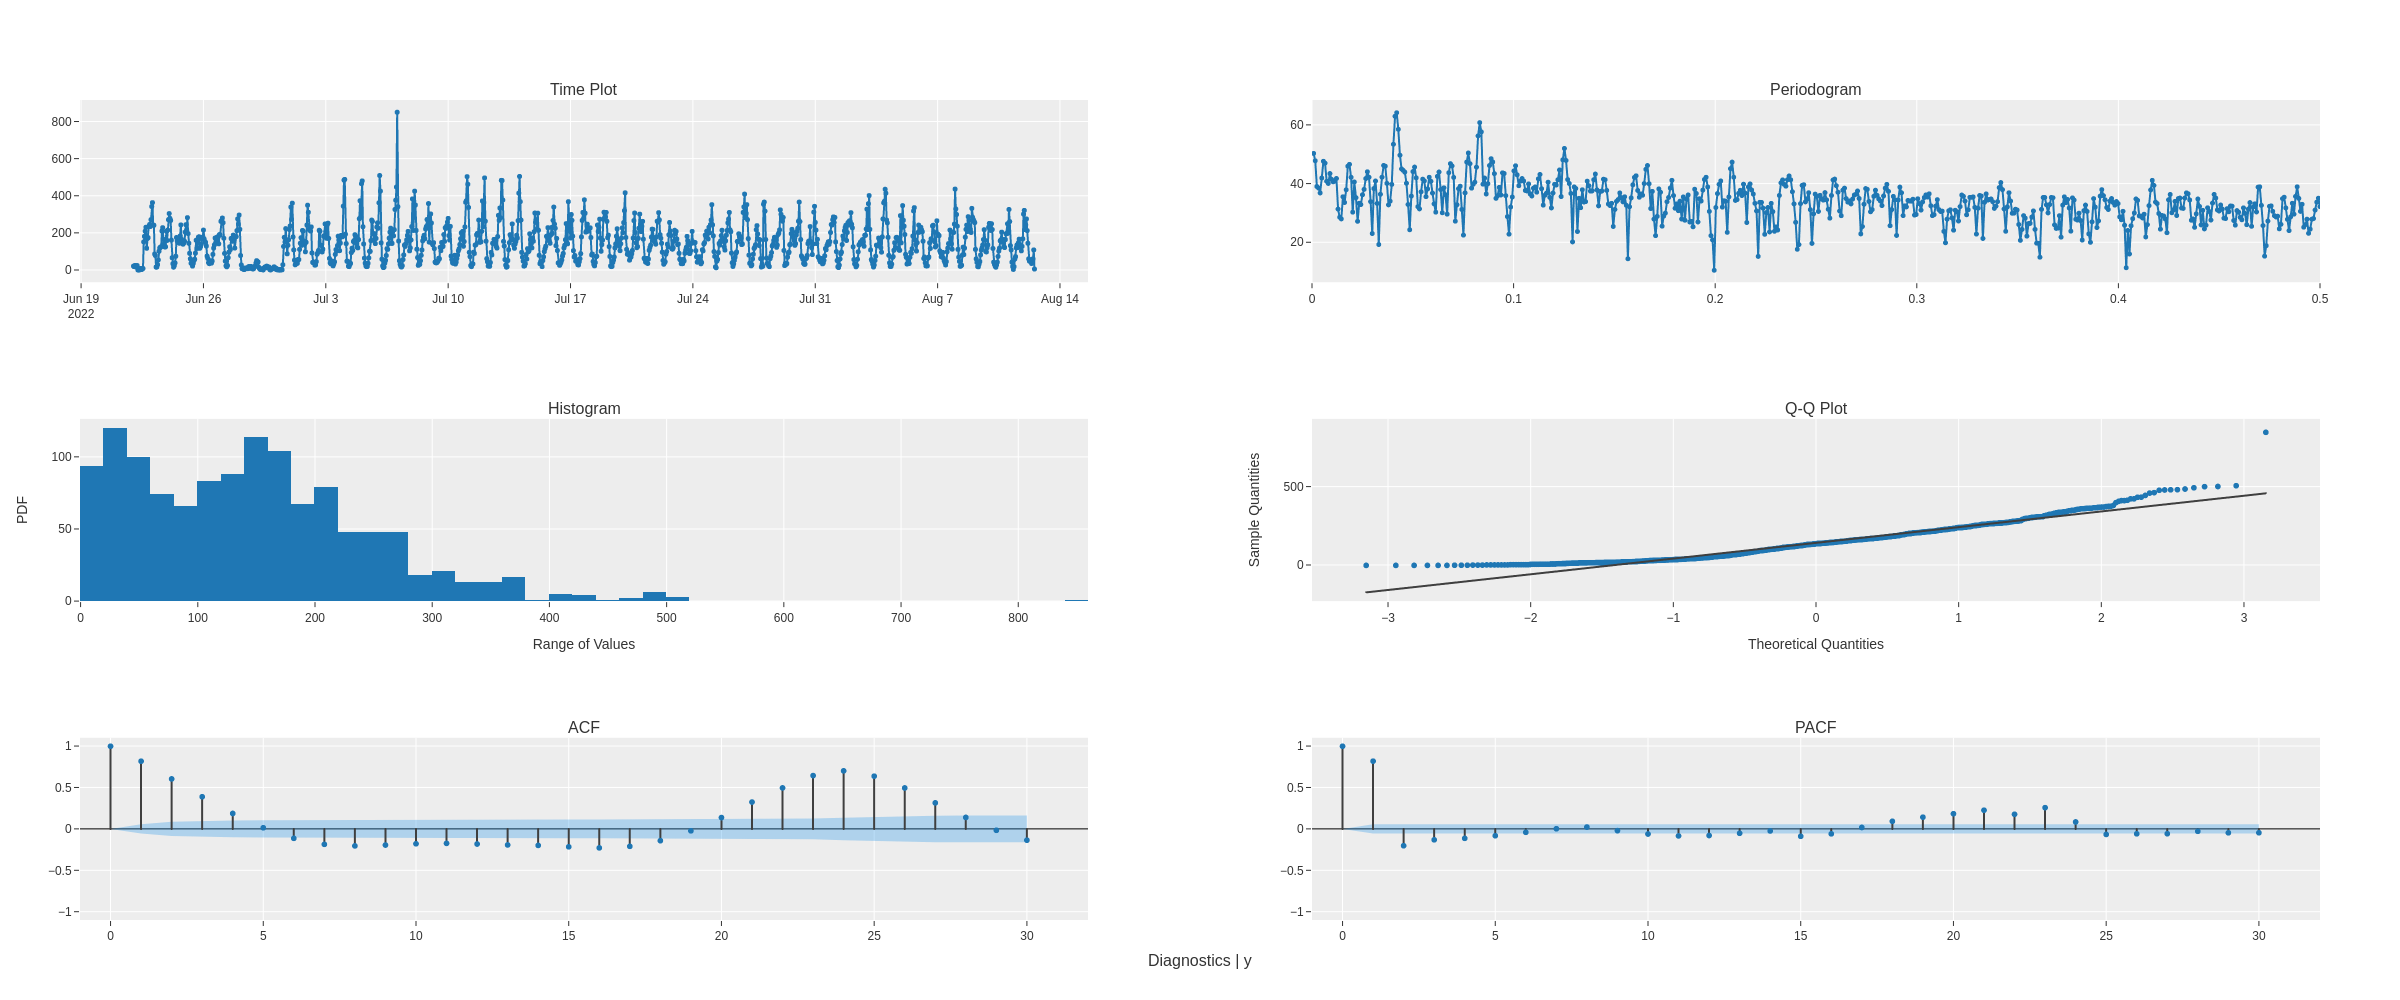

INFO:logs:Visual Rendered Successfully


In [11]:
#se plotea el diagnóstico
plot_model(plot = "diagnostics")

In [12]:
#Se comparan los modelos
best_model = compare_models(turbo=False, exclude = "auto_arima", verbose = True, sort="RMSE")

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
prophet,Prophet,33.9313,44.6877,0.3182,0.282,0.6783,0.5768,0.7358,3.8367
exp_smooth,Exponential Smoothing,35.2904,47.9218,0.3381,0.2784,0.7055,0.6188,0.7015,0.2767
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,35.7381,48.4727,0.3383,0.2832,0.7142,0.6258,0.6946,0.1667
tbats,TBATS,36.2448,48.826,0.3369,0.2845,0.7243,0.6303,0.689,73.9733
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,38.8995,50.2659,0.4025,0.3156,0.7774,0.6489,0.6707,0.1400
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,38.898,50.2671,0.4025,0.3156,0.7774,0.6489,0.6707,0.1633
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,38.8963,50.2681,0.4025,0.3156,0.7773,0.6489,0.6707,0.1533
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,38.8963,50.2681,0.4025,0.3156,0.7773,0.6489,0.6707,0.1600
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,38.8963,50.2681,0.4025,0.3156,0.7773,0.6489,0.6707,0.1500
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,38.9369,50.2798,0.4035,0.3161,0.7781,0.6491,0.6705,0.1433


INFO:logs:master_model_container: 29
INFO:logs:display_container: 2
INFO:logs:ProphetPeriodPatched()
INFO:logs:compare_models() successfully completed......................................


La comparación de modelos es uno de los núcleos de Pycaret. Compara muchos modelos y con buenos resultados. Como parámentros, se le 'pasó exclude' = 'auto_arima', turbo=False, verbose = True, sort='RMSE'. Con 'exclude' se puden excluir los algoritmos que no se quiere incluir en la comparación. 'turbo' cuando es 'True' excluye los algortimos más pesados en cuanto a procesamiento, incluyendo a Prophet entre otros. Con 'sort' le indicamos que ordene los algoritmos según la métrica de evaluación que se quiera. En este caso se le indicó RMSE para comparar con las predicciones realizadas en AutoArima y Prophet.

Sobre el resultado, se podría decir que el algoritmo que mayor precisión obtuvo fue Prophet. Si se compara el RMSE logrado es muy similiar al alcanzado cuando se probó Prophet. Esto quiere decir que realmente Pycaret hace un buen trabajo y es un buen comienzo para empezar indagar qué algoritmo usar ante una serie y con cuáles parámetros.

In [13]:
# Se imprime el mejor modelo y los parámetros utilizados para ese modelo
print(best_model)
print(best_model.get_params())

ProphetPeriodPatched()
{'add_country_holidays': None, 'add_seasonality': None, 'alpha': 0.05, 'changepoint_prior_scale': 0.05, 'changepoint_range': 0.8, 'changepoints': None, 'daily_seasonality': 'auto', 'freq': None, 'growth': 'linear', 'holidays': None, 'holidays_prior_scale': 10.0, 'interval_width': 0, 'mcmc_samples': 0, 'n_changepoints': 25, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0, 'stan_backend': None, 'uncertainty_samples': 1000, 'verbose': 0, 'weekly_seasonality': 'auto', 'yearly_seasonality': 'auto'}


Con los parámetros que Pycaret encontró, se puede trabajar con el algoritmo que mayor precisión obtuvo y usarlo de piso para buscar mejoras en la performance. 

In [14]:
final_best = finalize_model(best_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fa94ea6cbd0>, estimator=ProphetPeriodPatched(), fit_kwargs=None, groups=None, model_only=True, experiment_custom_tags=None, display=None)
INFO:logs:Finalizing ProphetPeriodPatched()
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fa94ea6cbd0>, estimator=ProphetPeriodPatched(), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Pro

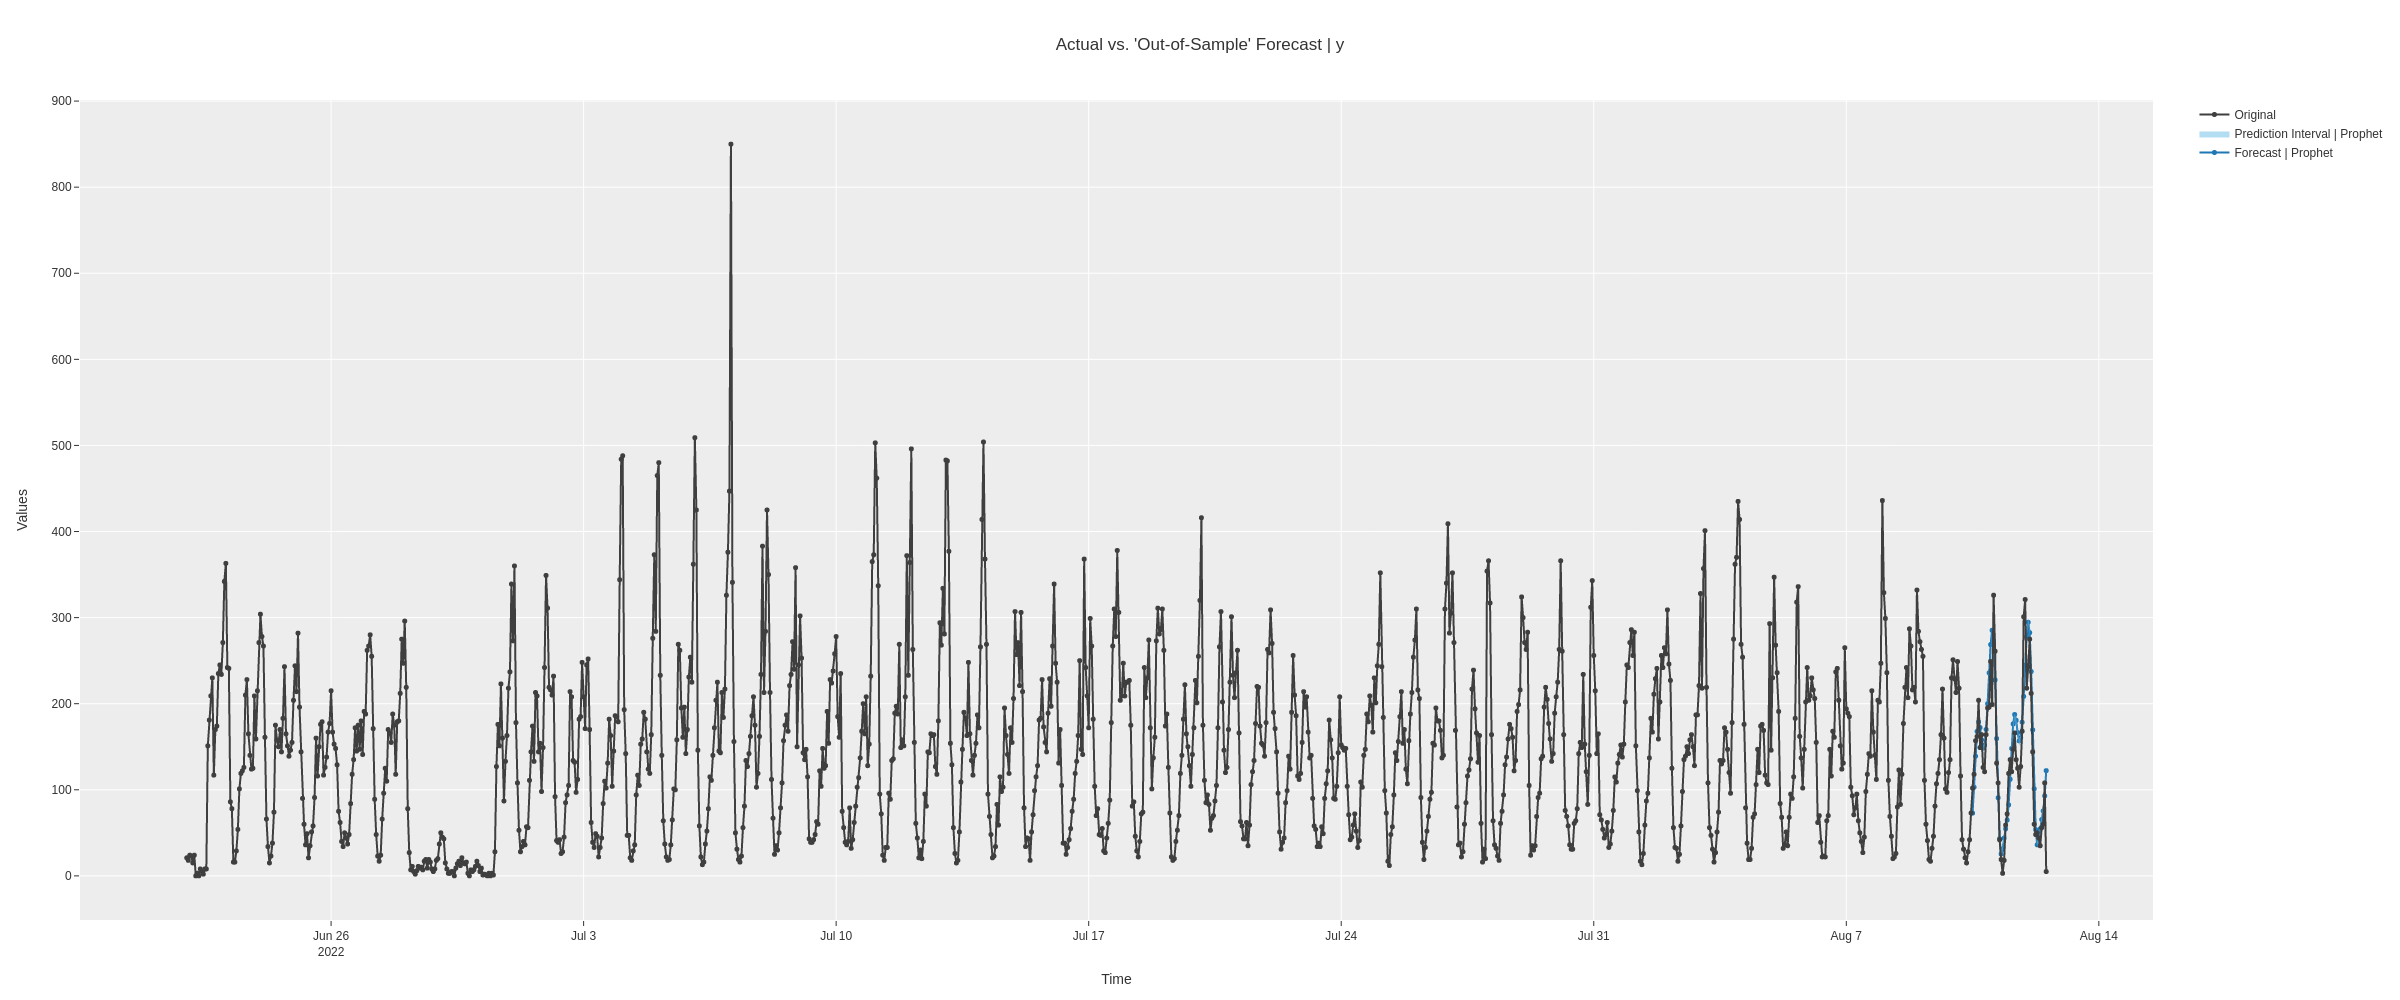

INFO:logs:Visual Rendered Successfully


In [15]:
#Se grafica los datos originales y la predicción
plot_model(best_model, plot = "forecast")

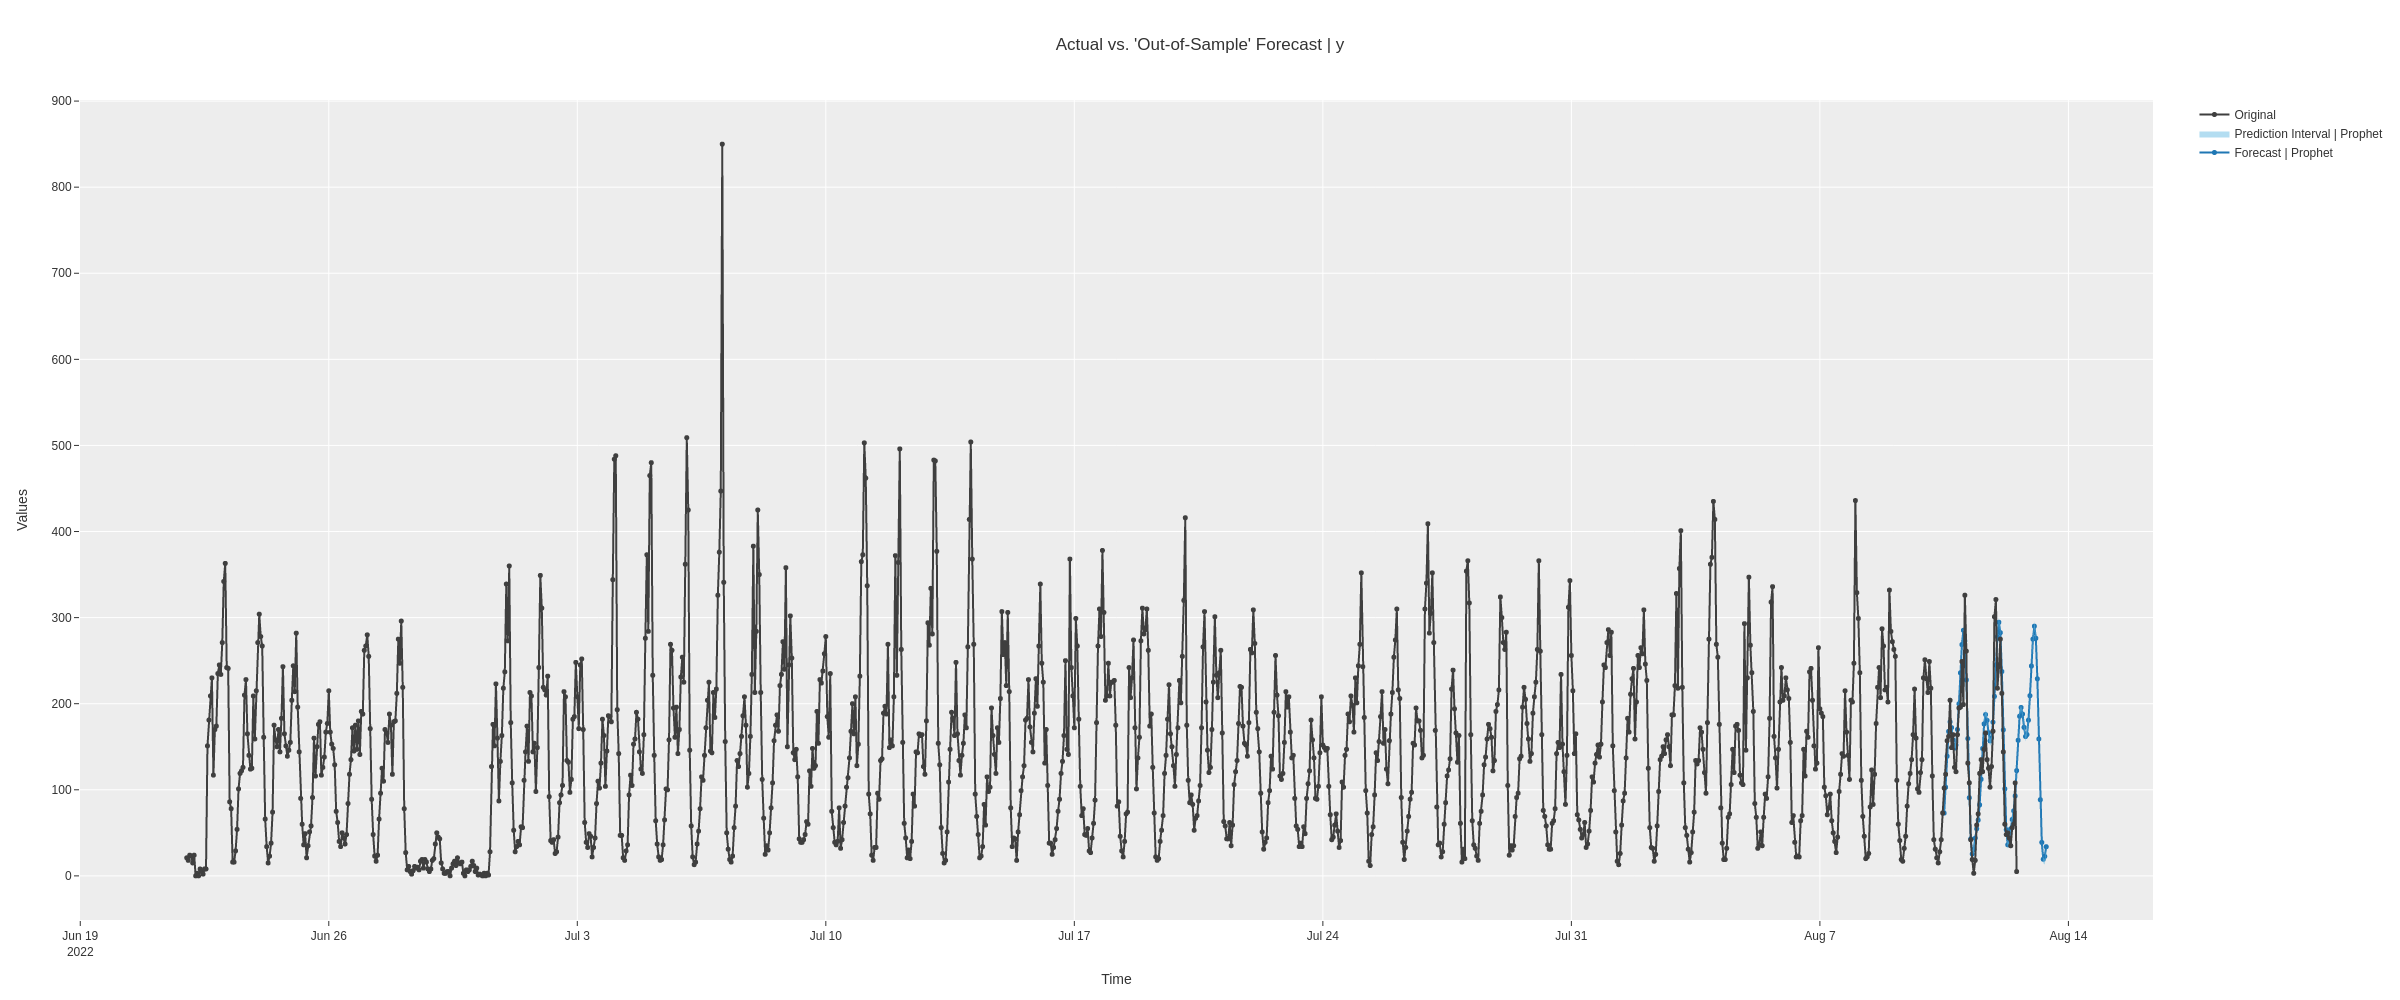

INFO:logs:Visual Rendered Successfully


In [16]:
#Se grafica la predicción hacía el futuro. 
plot_model(best_model, plot = "forecast", data_kwargs= {"fh" : 70})

Fin

Por último, para aquellos que estén interesados en el tema, la predicción realizada en este Colab puede ser mejorable. Aquellos que deseen enviar sus mejoras o consultas pueden enviarlas vía mail.

Para ir a los colab anteriores

Auto Arima Colab 1/3

https://drive.google.com/file/d/1TSKtIiU7BTAUlsn8BgxH-KWAJl5YtjLh/view?usp=sharing

Prophet Colab 2/3

https://drive.google.com/file/d/1cKr1_Y9687PjGWVT0o4ptMpByCSW81A7/view?usp=sharing